In [56]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [57]:
company_data = pd.read_csv("/Users/harigupta/Desktop/Data_science_for_Economics/EmpiricalProject/largest_companies_UK.csv")

In [58]:
company_data.head()

,Rank,Forbes 2000 rank,Name,Headquarters,Revenue(billions US$),Profit(billions US$),Assets(billions US$),Value(billions US$),Industry
0,1,16,Shell plc,London,261.76,20.27,404.38,211.10,Oil and Gas
1,2,38,HSBC,London,59.33,12.58,"2,957.94",135.30,Banking
2,3,50,BP,London,158.01,7.55,287.27,98.38,Oil and Gas
3,4,82,Rio Tinto,London,63.46,21.06,102.90,117.78,Mining
4,5,96,Lloyds Banking Group,London,58.48,7.36,"1,200.75",31.34,Banking


In [59]:
#calculating number of observations with missing data 
#Counting NaN and 0 values as missing for company data
missing_data_revenue = company_data.isnull().sum()
missing_data_revenue += (company_data == 0).sum()

print("Number of observations with missing data in revenue: ")
print(missing_data_revenue)

Number of observations with missing data in revenue: 
Rank                     0
Forbes 2000 rank         0
Name                     0
Headquarters             0
Revenue(billions US$)    0
Profit(billions US$)     0
Assets(billions US$)     0
Value(billions US$)      0
Industry                 0
dtype: int64


In [82]:
# Replace non-standard minus signs and convert to numeric
company_data['Profit(billions US$)'] = company_data['Profit(billions US$)'].astype(str)  # Ensure all data is string
company_data['Profit(billions US$)'] = company_data['Profit(billions US$)'].str.replace('−', '-')  # Replace with standard minus
company_data['Profit(billions US$)'] = pd.to_numeric(company_data['Profit(billions US$)'], errors='coerce')  # Convert to float

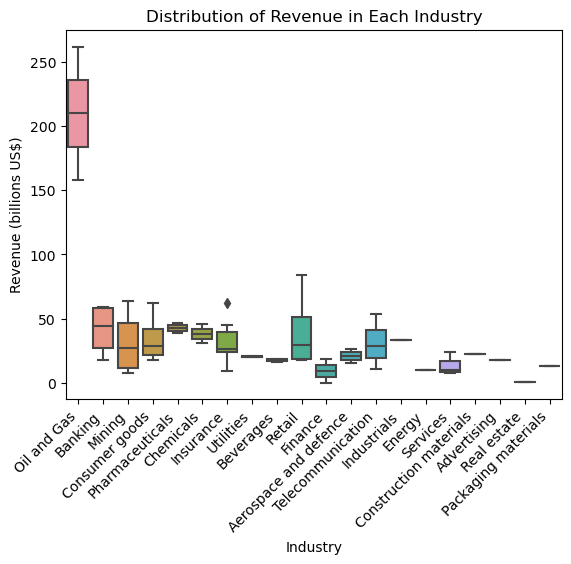

In [83]:
sns.boxplot(x='Industry', y='Revenue(billions US$)', data=company_data)
plt.title('Distribution of Revenue in Each Industry')
plt.xlabel('Industry')
plt.ylabel('Revenue (billions US$)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [84]:
total_revenue_by_industry = company_data.groupby('Industry')['Revenue(billions US$)'].sum().reset_index()
total_revenue_by_industry

,Industry,Revenue(billions US$)
0,Advertising,17.61
1,Aerospace and defence,42.28
2,Banking,165.84
3,Beverages,35.24
4,Chemicals,76.94
5,Construction materials,22.74
6,Consumer goods,138.18
7,Energy,10.33
8,Finance,28.48
9,Industrials,33.43


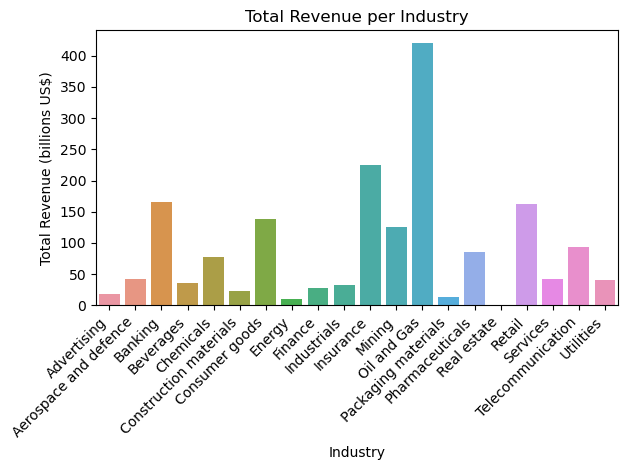

In [85]:
sns.barplot(x='Industry', y='Revenue(billions US$)', data=total_revenue_by_industry)

plt.title('Total Revenue per Industry', fontsize=12)
plt.xlabel('Industry', fontsize=10)
plt.ylabel('Total Revenue (billions US$)', fontsize=10)

# Rotate the x-axis labels so they fit and are readable
plt.xticks(rotation=45, ha='right')

# Use tight_layout to adjust the figure and prevent cut-off labels
plt.tight_layout()

# Show the plot
plt.show()

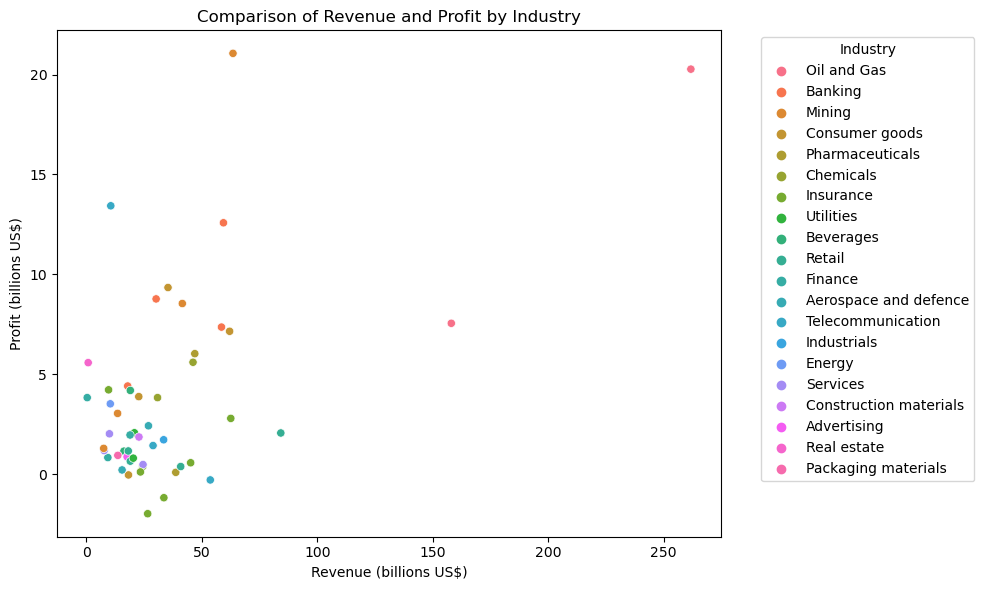

In [86]:
# Create a scatter plot to compare Revenue to Profits
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Revenue(billions US$)', y='Profit(billions US$)', data=company_data, hue='Industry')

# Adding plot title and labels
plt.title('Comparison of Revenue and Profit by Industry')
plt.xlabel('Revenue (billions US$)')
plt.ylabel('Profit (billions US$)')
#plt.ylim(25, -5)
#plt.yticks(range(-5, 26, 5))
#plt.ylim(min(y), max(y))

# Show the plot with a legend
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
